# 0-2. Pytorch Tutorial

- Tensor Basic
- Variable Autograd
- Linear regression


## 1. Tensor Basic

### Create Tensor

In [0]:
import torch

# rand(sizes) → [0,1)
x = torch.rand(2,3)
print(x)

# zeros(2,3) → all zeros
x = torch.zeros(2,3)
print(x)

# ones(2,3) → all ones
x = torch.ones(2,3)
print(x)

# .size() → print size of the tensor
print(x.size())

# arange(start,end,step) → [start,end) with step
x = torch.arange(0,3,0.5)
print(x)


tensor([[0.4705, 0.4907, 0.3786],
        [0.6908, 0.2744, 0.8867]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
torch.Size([2, 3])
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])


### Tensor Data type

In [0]:
# torch.FloatTensor(size or list)
x = torch.FloatTensor([3,5])
print(x)

# tensor.type_as(tensor_type)
x = x.type_as(torch.IntTensor())
print(x)

tensor([3., 5.])
tensor([3, 5], dtype=torch.int32)


### Numpy to Tensor, Tensor to Numpy

In [0]:
import numpy as np

# define numpy array
x = np.array([[1,2,3],[4,5,6]])
print(x)
 
# .from_numpy → numpy to tensor
x = torch.from_numpy(x)
print(x)

# .numpy → tensor to numpy
x = x.numpy()
print(x)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])
[[1 2 3]
 [4 5 6]]


### Tensor on GPU

In [0]:
x = torch.FloatTensor([[1,2,3],[4,5,6]])
print(x)

x = x.cuda()
print(x)

x = x.cpu()
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')
tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 2. Variable Autograd

In [0]:
# import libraries
import torch
from torch.autograd import Variable

In [0]:
x = torch.Tensor([3,4])
print(x)

var_x = Variable(x)
print(var_x)
print('\n')

# .data → data of variable 
print(var_x.data)

# .grad → gradient of variable 
print(var_x.grad)

# .grad_fn → print the reference function
#             (variable which user made = None)
print(var_x.grad_fn)

# .requires_grad → whether variable requires gradient
print(var_x.requires_grad)

var_x = Variable(x,requires_grad=True)
var_x.requires_grad


tensor([3., 4.])
tensor([3., 4.])


tensor([3., 4.])
None
None
False


True

In [0]:
x = Variable(torch.ones(1), requires_grad=True)
print(x)

# Operation
y = x + 5
print(y)

z = y * y * 3
print(z)

# Backpropagation
z.backward()

# Print gradient
print(x.grad)

tensor([1.], requires_grad=True)
tensor([6.], grad_fn=<AddBackward0>)
tensor([108.], grad_fn=<MulBackward0>)
tensor([36.])


## 3. Linear Regression

### Linear regression y = 3x+2

#### Without using Pytorch

In [0]:
# import library
import numpy as np

In [0]:
nb_data = 1000 

noise = np.random.normal(0, 1, [1000,1])
x = np.random.rand(1000,1)*20-10

y = 3*x+2
y_noise = 3*x+2+noise

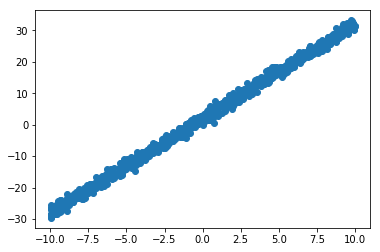

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x,y_noise)

In [0]:
# Parameter initialize
w = 0
b = 0
lr = 0.001
loss = 0

In [0]:
for epoch in range(10):
  for d in  range(1000):
    # forward pass
    pred = x[d]*w+b
    
    # loss calculate
    loss_i = 1/2*(y_noise[d]-pred)**2
    loss += loss_i.item()
    
    # backpropagation
    w1 = w + lr*(y_noise[d]-pred)*x[d]
    b1 = b + lr*(y_noise[d]-pred)
    
    # parameter update
    w = w1
    b = b1
    
  loss = loss/1000
  print(loss)
  loss = 0

3.696368298769596
0.6471364109885474
0.5419746938047086
0.5271659394541474
0.5249320149269907
0.5245429415091688
0.5244581349324086
0.5244348189750144
0.5244273146959846
0.5244247030023047


[2.99466923] [1.93233392]


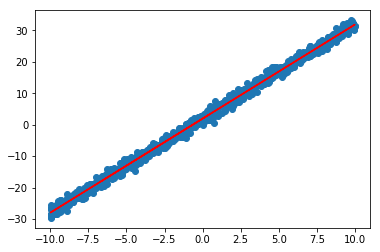

In [0]:
print(w,b)

res_grad = w
res_intp = b

plt.scatter(x,y_noise)
plt.plot(x,res_grad*x+res_intp,'r')

#### Using Pytorch (Basis of Deep Learning)

In [0]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.autograd import Variable

In [0]:
nb_data = 1000 

noise = init.normal(torch.FloatTensor(nb_data,1),std=1)
x = init.uniform(torch.Tensor(nb_data,1),-10,10)

y = 3*x+2
y_noise = 3*x+2+noise

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: nn.init.uniform is now deprecated in favor of nn.init.uniform_.
  after removing the cwd from sys.path.


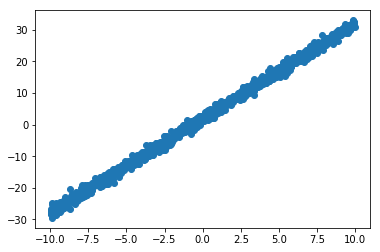

In [0]:
import matplotlib.pyplot as plt

plt.scatter(x.numpy(),y_noise.numpy())

In [0]:
model = nn.Linear(1,1)
output = model(Variable(x))

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [0]:
# train

nb_epoch = 300

label = Variable(y_noise)

for i in range(nb_epoch):
  
    # 1. clear the gradients of all optimized variables
    optimizer.zero_grad()
    
    # 2. forward pass
    output = model(Variable(x))
    
    # 3. calculate the loss
    loss = criterion(output,label)
    
    # 4. backward pass
    loss.backward()
    
    # 5. parameter update
    optimizer.step()
    
    if i % 10 == 0:
        print(loss)

tensor(459.8533, grad_fn=<MseLossBackward>)
tensor(3.9332, grad_fn=<MseLossBackward>)
tensor(2.9410, grad_fn=<MseLossBackward>)
tensor(2.2778, grad_fn=<MseLossBackward>)
tensor(1.8347, grad_fn=<MseLossBackward>)
tensor(1.5385, grad_fn=<MseLossBackward>)
tensor(1.3405, grad_fn=<MseLossBackward>)
tensor(1.2082, grad_fn=<MseLossBackward>)
tensor(1.1198, grad_fn=<MseLossBackward>)
tensor(1.0607, grad_fn=<MseLossBackward>)
tensor(1.0212, grad_fn=<MseLossBackward>)
tensor(0.9948, grad_fn=<MseLossBackward>)
tensor(0.9772, grad_fn=<MseLossBackward>)
tensor(0.9654, grad_fn=<MseLossBackward>)
tensor(0.9575, grad_fn=<MseLossBackward>)
tensor(0.9523, grad_fn=<MseLossBackward>)
tensor(0.9487, grad_fn=<MseLossBackward>)
tensor(0.9464, grad_fn=<MseLossBackward>)
tensor(0.9448, grad_fn=<MseLossBackward>)
tensor(0.9438, grad_fn=<MseLossBackward>)
tensor(0.9431, grad_fn=<MseLossBackward>)
tensor(0.9426, grad_fn=<MseLossBackward>)
tensor(0.9423, grad_fn=<MseLossBackward>)
tensor(0.9421, grad_fn=<MseLossB

In [0]:
param_list = list(model.parameters())
print(param_list[0].data,param_list[1].data)

tensor([[2.9970]]) tensor([2.0200])


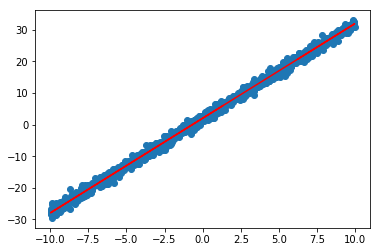

In [0]:
import matplotlib.pyplot as plt

res_grad = param_list[0].data.numpy()
res_intp = param_list[1].data.numpy()

plt.scatter(x.numpy(),y_noise.numpy())
plt.plot(x.numpy(),res_grad*x.numpy()+res_intp,'r')